# Importing and Loading

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
import shutil
import random
from glob import glob

In [ ]:
!pip install roboflow

# Imprting The Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="3hwJ5It8G8YiFoiDLpPq")
project = rf.workspace("hehe-ngdal").project("orchid-leaf-spots-blujx")
version = project.version(11)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


# Reaching The *Dataset*

In [ ]:
path = '/content/Orchid-leaf-spots-11'

dataset_path = os.path.join(path, "data.yaml")

print(open(dataset_path).read())

names:
- burn
- rot
- spot
nc: 3
roboflow:
  license: CC BY 4.0
  project: orchid-leaf-spots-blujx
  url: https://universe.roboflow.com/hehe-ngdal/orchid-leaf-spots-blujx/dataset/11
  version: 11
  workspace: hehe-ngdal
test: ../test/images
train: ../train/images
val: ../valid/images



# Training The Model

## Loading The YOLOv8 (small)

In [ ]:
model = YOLO('yolov8s.pt')

## Training The Model

In [ ]:
dataset_path

'/content/Orchid-leaf-spots-11/data.yaml'

In [ ]:
model.train(data = dataset_path, epochs = 30, imgsz = 640)

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Orchid-leaf-spots-11/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/Orchid-leaf-spots-11/train/labels.cache... 1566 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1566/1566 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1228, len(boxes) = 14595. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 583.0±309.4 MB/s, size: 70.1 KB)


val: Scanning /content/Orchid-leaf-spots-11/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.22G      2.452      2.577      1.786        145        640: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        205       2749      0.178      0.287      0.152     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.74G      2.397       2.26      1.722        135        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


                   all        205       2749      0.186      0.217       0.15     0.0548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.74G      2.415      2.228      1.776        172        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


                   all        205       2749      0.188      0.343       0.14     0.0525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.27G      2.403      2.223      1.758        768        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        205       2749      0.266      0.255      0.196     0.0658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.86G      2.394      2.197      1.727        299        640: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        205       2749       0.13      0.221      0.085     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.11G      2.354      2.135      1.712        149        640: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        205       2749      0.192      0.247      0.141      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.11G      2.346      2.066      1.705        212        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        205       2749      0.233      0.279      0.206      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.68G       2.33      2.074      1.661        126        640: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        205       2749      0.244      0.234      0.179      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.29G      2.302      2.026      1.649        111        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        205       2749      0.277      0.264      0.189     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.29G      2.287      1.999      1.651        112        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        205       2749      0.194      0.254       0.18     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.29G       2.29      1.962      1.662        116        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        205       2749       0.26      0.276       0.19     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.94G      2.266      1.914      1.654        341        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        205       2749      0.222      0.381      0.165     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.39G      2.246      1.882      1.633        187        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        205       2749      0.264      0.291      0.186     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.47G      2.197      1.831      1.604        105        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        205       2749      0.218      0.232       0.16     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       5.8G      2.205      1.804      1.598         96        640: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        205       2749      0.264      0.239      0.182     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       5.8G       2.22      1.785      1.591        107        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        205       2749      0.236      0.238      0.172     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.36G      2.176      1.786      1.606        289        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        205       2749      0.248      0.294      0.195     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.36G      2.168      1.745      1.591        201        640: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        205       2749      0.259      0.278      0.172     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.99G      2.155      1.761      1.561        122        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        205       2749      0.251      0.249      0.219      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.01G      2.133      1.701      1.574        190        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        205       2749      0.222      0.312      0.166     0.0677


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.04G      2.164      1.718      1.637        286        640: 100%|██████████| 98/98 [00:37<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


                   all        205       2749      0.241       0.25      0.197     0.0831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.04G      2.152      1.626      1.614         87        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        205       2749      0.279      0.305      0.236     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.04G      2.136      1.621        1.6        119        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        205       2749      0.283      0.297      0.217     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.08G      2.106      1.597      1.595        154        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        205       2749      0.326      0.346      0.213     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.08G      2.098      1.553      1.585         55        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        205       2749      0.268      0.269      0.185     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.08G      2.079      1.512      1.562         80        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        205       2749      0.257      0.244      0.192     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.12G      2.068      1.481      1.562        200        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        205       2749      0.297      0.224      0.172     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.12G      2.042      1.446      1.536         84        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        205       2749      0.286      0.235      0.212     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.13G      2.026      1.436      1.543        131        640: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all        205       2749      0.282      0.242      0.209     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.15G      1.992      1.392      1.519         70        640: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        205       2749      0.312      0.237       0.21     0.0893



30 epochs completed in 0.292 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


                   all        205       2749      0.251      0.249      0.219      0.109
                  burn          6          9    0.00878      0.111      0.116      0.104
                   rot        103        513      0.492      0.335      0.378      0.173
                  spot        139       2227      0.252        0.3      0.164     0.0505
Speed: 0.3ms preprocess, 5.2ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aee4647fcd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# Evaluate The Model

In [ ]:
mtrc = model.val(data = dataset_path)

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1427.8±318.0 MB/s, size: 68.3 KB)


val: Scanning /content/Orchid-leaf-spots-11/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


                   all        205       2749       0.25       0.25      0.219      0.109
                  burn          6          9    0.00868      0.111      0.116      0.104
                   rot        103        513      0.491      0.336      0.379      0.173
                  spot        139       2227       0.25      0.302      0.163     0.0505
Speed: 2.5ms preprocess, 9.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train42



image 1/1 /content/Orchid-leaf-spots-11/test/images/DSC00112-800x600_jpg.rf.18d2c86a93bf2237f3a15f9a08b6abb3.jpg: 640x640 1 rot, 1 spot, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


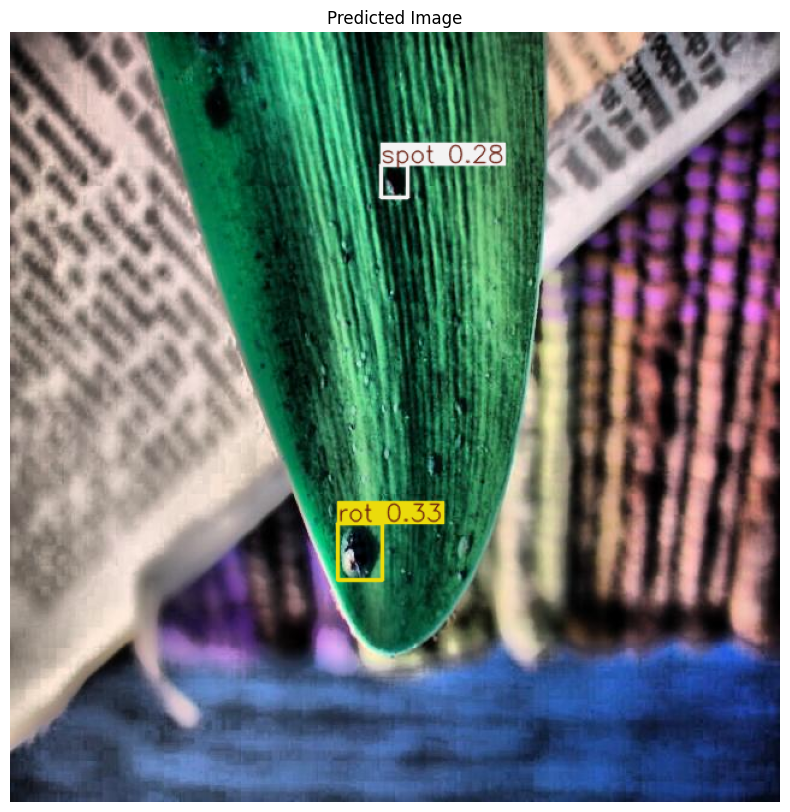

In [ ]:
model = YOLO('runs/detect/train4/weights/best.pt')
rslt = model('/content/Orchid-leaf-spots-11/test/images/DSC00112-800x600_jpg.rf.18d2c86a93bf2237f3a15f9a08b6abb3.jpg', save = True)

predicted_image_detect = rslt[0].plot()

plt.figure(figsize = (10, 10))
plt.imshow(predicted_image_detect)
plt.axis('off')
plt.title('Predicted Image')
plt.show()


image 1/1 /content/Orchid-leaf-spots-11/test/IMG_6123.jpg: 640x480 1 burn, 43.5ms
Speed: 3.4ms preprocess, 43.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2


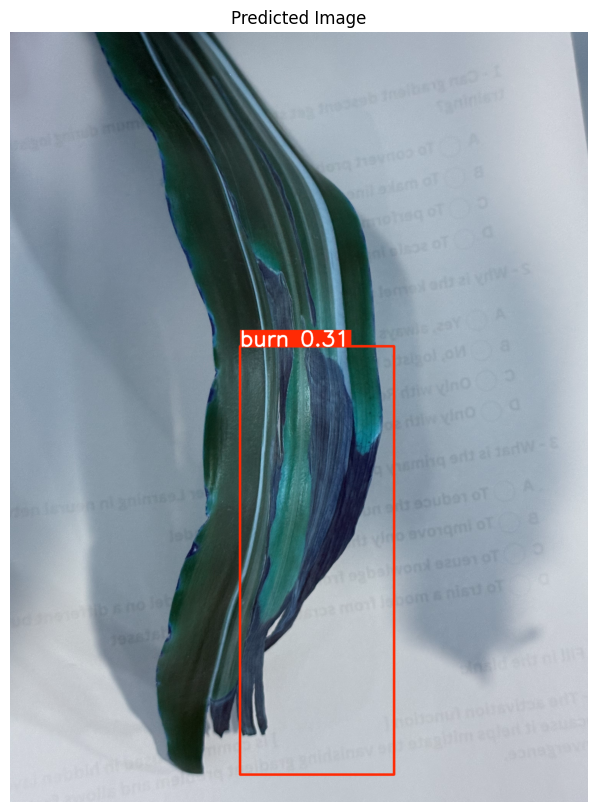

In [ ]:
model = YOLO('runs/detect/train4/weights/best.pt')
rslt = model('/content/Orchid-leaf-spots-11/test/IMG_6123.jpg', save = True)

predicted_image_detect = rslt[0].plot()

plt.figure(figsize = (10, 10))
plt.imshow(predicted_image_detect)
plt.axis('off')
plt.title('Predicted Image')
plt.show()

# Train The Model

In [ ]:
model.train(
    data=dataset_path,
    epochs=30,
    imgsz=640,
    hsv_h=0.015,
    hsv_s=0,
    hsv_v=0.4,
    degrees=2,
    translate=0.02,
    scale=0.5,
    shear=0,
    flipud=0.0,
    fliplr=0.1,
    mosaic=0,
    mixup=0
)

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train4/weights/best.pt, data=/content/Orchid-leaf-spots-11/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

train: Scanning /content/Orchid-leaf-spots-11/train/labels.cache... 1566 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1566/1566 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1228, len(boxes) = 14595. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 504.1±144.3 MB/s, size: 70.1 KB)


val: Scanning /content/Orchid-leaf-spots-11/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.29G      2.429      2.511       1.86        162        640: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


                   all        205       2749      0.271      0.237      0.176      0.063

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.82G      2.314      1.999      1.722         52        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        205       2749      0.187      0.237      0.132      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.82G      2.274      1.945      1.716         57        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        205       2749        0.2      0.158     0.0924     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.82G      2.259      1.861        1.7        351        640: 100%|██████████| 98/98 [00:33<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        205       2749      0.239       0.31      0.182     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.82G      2.223      1.866      1.695        432        640: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


                   all        205       2749      0.222       0.23      0.156     0.0628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.82G      2.214      1.811       1.69         94        640: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        205       2749      0.228      0.269      0.174     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.82G      2.217      1.761       1.67        147        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        205       2749      0.258      0.244      0.182     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.82G      2.185      1.717      1.653        112        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        205       2749      0.238      0.263      0.193     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.85G      2.163      1.696      1.657         73        640: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        205       2749      0.267      0.256        0.2     0.0835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.85G      2.143       1.65       1.63        131        640: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        205       2749      0.245      0.226      0.155     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.86G      2.122      1.649      1.631        126        640: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        205       2749      0.279      0.249      0.237      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.88G      2.119      1.639      1.619        103        640: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        205       2749      0.272       0.26      0.197     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.88G      2.102      1.596      1.609        199        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        205       2749      0.304      0.218      0.211      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.88G      2.103      1.564      1.599         83        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        205       2749      0.285      0.235      0.192     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       6.9G      2.096      1.566      1.603         86        640: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


                   all        205       2749      0.252      0.279      0.179     0.0763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       6.9G       2.08       1.51      1.553        207        640: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        205       2749       0.27      0.287      0.198     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       6.9G      2.066       1.49      1.584        166        640: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        205       2749      0.309      0.227      0.196     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       6.9G      2.033      1.445       1.56        105        640: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        205       2749      0.289      0.248      0.194     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       6.9G       2.01       1.44      1.547         63        640: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        205       2749      0.277      0.241      0.161     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       6.9G      1.998      1.422      1.548        153        640: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749       0.24      0.241      0.183     0.0717


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       6.9G      1.993        1.4      1.532        293        640: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


                   all        205       2749      0.343      0.222       0.19     0.0787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       6.9G      1.981      1.361      1.518         89        640: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        205       2749      0.283      0.278      0.218     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       6.9G      1.973      1.346      1.498        119        640: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749      0.304      0.224      0.187     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       6.9G      1.933      1.327      1.495        158        640: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        205       2749      0.325      0.224      0.187     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       6.9G      1.932      1.307      1.487         55        640: 100%|██████████| 98/98 [00:29<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        205       2749      0.326      0.222      0.179     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       6.9G      1.934      1.288       1.48         82        640: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        205       2749      0.291      0.219      0.168     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       6.9G      1.898      1.258      1.467        202        640: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        205       2749      0.347      0.215       0.22      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       6.9G      1.886      1.239      1.452         82        640: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        205       2749      0.323      0.233       0.19     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       6.9G      1.878      1.236      1.456        129        640: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        205       2749       0.35      0.236      0.196     0.0832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       6.9G      1.836      1.194      1.438         70        640: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        205       2749      0.344      0.221      0.191     0.0801



30 epochs completed in 0.278 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 22.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        205       2749       0.28       0.25      0.237      0.115
                  burn          6          9     0.0323      0.111      0.116      0.104
                   rot        103        513      0.516      0.386      0.425       0.19
                  spot        139       2227      0.293      0.251      0.169     0.0508
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aee52f5d910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# Results:-

**Precision**:

**Recall**:

**mAP50**:

**mAP50-95**:

**Fitness**: